# Ornstein-Uhlenbeck Process Parameter Estimation

The Ornstein-Uhlenbeck SDE is used to model mean reverting processes and is defined by,

$
\begin{align}
dX_t = \lambda \left( \mu - X_t \right) dt + \sigma dB_t
\end{align}
$

where $dB_t \sim \text{Normal}(0, dt)$. The solution is given by,

$
\begin{align}
X_t = X_0 e^{-\lambda t} + \mu\left( 1 - e^{-\lambda t} \right) + \sqrt{ \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda t} \right)} \hspace{5pt} \varepsilon_t \hspace{30pt}
\end{align}
$

Assume $X_t$ is known. If follows that for $t+\Delta t$,

$
\begin{align}
X_{t+\Delta t} =  X_t e^{-\lambda \Delta t} + \mu \left( 1 - e^{-\lambda \Delta t} \right) + \sqrt{ \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda \Delta t} \right)} \hspace{5pt} \varepsilon_t
\end{align}
$

Now, $\text{AR}(1)$ with constant offset is given by,

$
\begin{align}
X_t = \hat{\varphi} X_{t-1} + \hat{\mu} + \hat{\sigma} \varepsilon_t
\end{align}
$

Comparing with the previous equation gives,

$
\begin{align}
&\hat{\varphi} = e^{-\lambda \Delta t} \\
&\hat{\mu} = \mu \left(1 - e^{-\lambda \Delta t} \right) \\
&\hat{\sigma}^2 = \frac{\sigma^2}{2\lambda}\left(1 - e^{-2\lambda \Delta t}\right)
\end{align}
$

OLS can be used to determine $\hat{\varphi}$, $\hat{\mu}$ and $\hat{\sigma}$ from the available data. Then $\lambda$ is given by,

$
\begin{align}
\lambda = - \frac{\ln{\hat{\varphi}}}{\Delta t}
\end{align}
$

Substitution into the equation for $\mu$ gives,

$
\begin{align}
\mu = \frac{\hat{\mu}}{1 - \hat{\varphi}}
\end{align}
$

and

$
\begin{align}
\sigma^2 = \frac{2\lambda\hat{\sigma}^2}{1 - \hat{\varphi}^2}
\end{align}
$

The errors for the Ornstein-Uhlenbeck parameters in terms of the $\text{AR}(1)$ errors are given by,

$
\begin{align}
&\Delta_\lambda = -\frac{1}{\hat{\varphi}\Delta t}\Delta_\hat{\varphi} \\
&\Delta_\mu = \frac{\hat{\mu}}{\left(1-\hat{\varphi}\right)}\Delta_\hat{\varphi} + \frac{1}{1-\hat{\varphi}}\Delta_\hat{\mu} \\
&\Delta_{\sigma^2} = \frac{4\lambda\hat{\varphi}\hat{\sigma}^2}{\left(1 - \hat{\varphi}^2\right)^2}\Delta_\hat{\varphi} + 
                     \frac{2\hat{\sigma}^2}{1 - \hat{\varphi}^2}\Delta_\lambda + \frac{2\lambda}{1 - \hat{\varphi}^2}\Delta_{\hat{\sigma}^2}
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (OU)
from lib import (curve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Ornstein-Uhlenbeck Process Parameter Estimation Examples

The Ornstein-Uhlenbeck Process is a model of a mean reverting process. Two parameters assumed known,

* $\Delta t$ the time step length.
* $X_0$ the initial value of the process.

and three estimated parameters,

* $\mu$ the time asymptotic process mean.
* $\lambda$ the time scale of decay to asymptotic mean.
* $\sigma$ the standard deviation of the noise term.


### Verification for $\text{AR}(1)$ limit, $\Delta t \to 1$

In this limit for $\mu = 0$ it follows that $\hat{\varphi} = 1 - \lambda$. This result is verified with the following example.

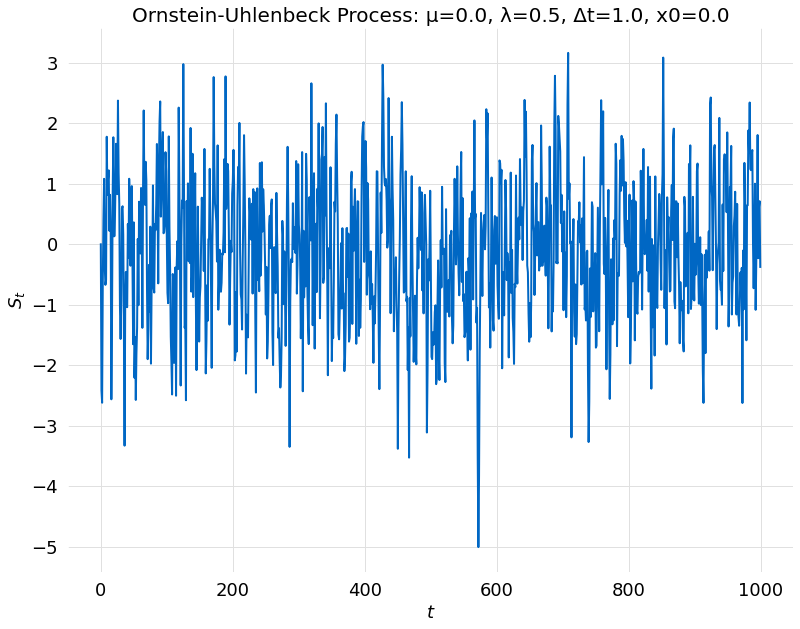

In [72]:
Δt = 1.0
x0 = 0.0
npts = 1000
μ = 0.0
λ = 0.5
σ = 1.0
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
ou = OU.Source.PROC.create(**params)
curve(ou)

In [73]:
result = OU.Est.AR.perform(ou)
result.summary()
result.ar_result.summary()

╒════╤═══╕
│ Δt │ 1 │
├────┼───┤
│ X0 │ 0 │
╘════╧═══╛
╒═════════════╤════════════╤════════════╕
│ Parameter   │   Estimate │      Error │
╞═════════════╪════════════╪════════════╡
│ μ           │  -0.194078 │  0.103925  │
├─────────────┼────────────┼────────────┤
│ λ           │   0.792454 │ -0.0635665 │
├─────────────┼────────────┼────────────┤
│ σ2          │   2.1355   │ -0.0027442 │
╘═════════════╧════════════╧════════════╛


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1453.458
Date:                Sun, 17 Jul 2022   AIC                           2912.916
Time:                        17:05:57   BIC                           2927.639
Sample:                             0   HQIC                          2918.512
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1062      0.060     -1.772      0.076      -0.224       0.011
ar.L1          0.4527      0.029     15.732      0.000       0.396       0.509
sigma2         1.0712      0.049     21.667      0.000       0.974       1.168
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.55   Prob(JB):                         0.42
Heteroskedasticity (H):               0.89   Skew:                            -0.09
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

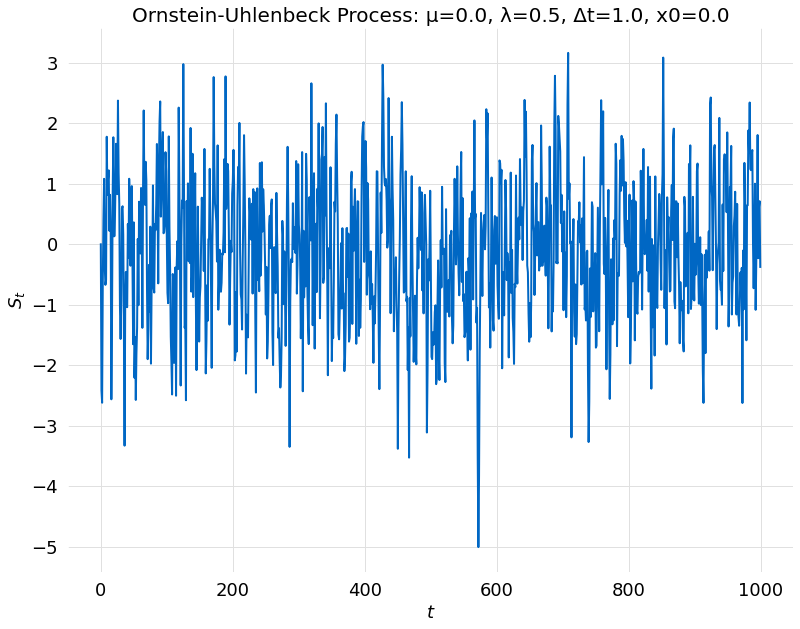

In [72]:
Δt = 1.0
x0 = 0.0
npts = 1000
μ = 0.0
λ = 0.5
σ = 1.0
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
ou = OU.Source.PROC.create(**params)
curve(ou)

### Behavior for $\Delta t < 1$

For small $\Delta t$ the following relation is approximately true if $\mu = 0$, $\hat{\varphi} \approx 1 - \lambda \Delta t$. So for fixed $\lambda$ if follows that $\hat{\varphi} \to 1$.</br> 
This is shown in first example where it is also seen that the estimate of $\lambda$ is way off. Increasing $\lambda$ causes $\varphi$ to decrease but the $\lambda$ esimates are way off. </br>
This method of extimation does not work so well. A little reserach shows that this is a harder problem to solve than attempted here.

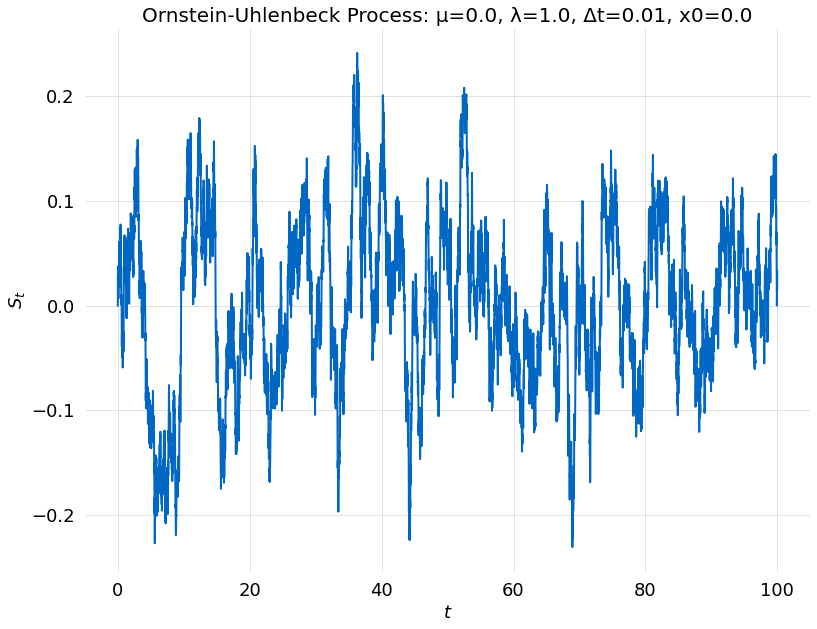

In [76]:
Δt = 0.01
x0 = 0.0
npts = 10000
μ = 0.0
λ = 1.0
σ = 1.0
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
ou = OU.Source.PROC.create(**params)
curve(ou)

In [77]:
result = OU.Est.AR.perform(ou)
result.summary()
result.ar_result.summary()

╒════╤═══╕
│ Δt │ 1 │
├────┼───┤
│ X0 │ 0 │
╘════╧═══╛
╒═════════════╤═════════════╤══════════════╕
│ Parameter   │    Estimate │        Error │
╞═════════════╪═════════════╪══════════════╡
│ μ           │ 0.159166    │  1.48435     │
├─────────────┼─────────────┼──────────────┤
│ λ           │ 0.00826708  │ -0.00127191  │
├─────────────┼─────────────┼──────────────┤
│ σ2          │ 0.000102041 │  1.31381e-06 │
╘═════════════╧═════════════╧══════════════╛


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               31800.070
Date:                Sun, 17 Jul 2022   AIC                         -63594.141
Time:                        17:27:56   BIC                         -63572.510
Sample:                             0   HQIC                        -63586.819
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.012      0.107      0.915      -0.023       0.025
ar.L1          0.9918      0.001    786.222      0.000       0.989       0.994
sigma2         0.0001   1.43e-06     70.703      0.000    9.84e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.93   Prob(JB):                         0.97
Heteroskedasticity (H):               1.01   Skew:                            -0.01
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

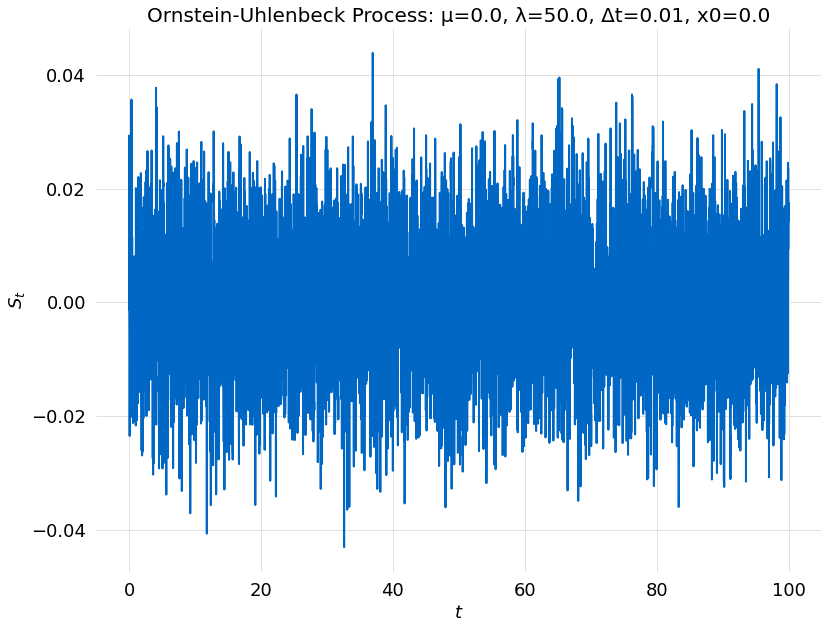

In [83]:
Δt = 0.01
x0 = 0.0
npts = 10000
μ = 0.0
λ = 50.0
σ = 1.0
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
ou = OU.Source.PROC.create(**params)
curve(ou)

In [84]:
result = OU.Est.AR.perform(ou)
result.summary()
result.ar_result.summary()

╒════╤═══╕
│ Δt │ 1 │
├────┼───┤
│ X0 │ 0 │
╘════╧═══╛
╒═════════════╤══════════════╤══════════════╕
│ Parameter   │     Estimate │        Error │
╞═════════════╪══════════════╪══════════════╡
│ μ           │ -0.000213232 │  0.000391827 │
├─────────────┼──────────────┼──────────────┤
│ λ           │  0.698863    │ -0.0174495   │
├─────────────┼──────────────┼──────────────┤
│ σ2          │  0.000183936 │  1.48514e-07 │
╘═════════════╧══════════════╧══════════════╛


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               31908.375
Date:                Sun, 17 Jul 2022   AIC                         -63810.750
Time:                        17:30:32   BIC                         -63789.119
Sample:                             0   HQIC                        -63803.428
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.542      0.588      -0.000       0.000
ar.L1          0.4972      0.009     57.308      0.000       0.480       0.514
sigma2      9.907e-05   1.42e-06     69.840      0.000    9.63e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.55   Prob(JB):                         0.39
Heteroskedasticity (H):               0.95   Skew:                             0.02
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""